# IBM Coursera Advanced Data Science Capstone

### Wali Farooqui

# Credit Card Fraud Detection

As the name suggests, I am going build a model to detect credit card fraud. Credit Card Fraud Detection models help credit card issuers to protect their customers from any illegitimate transactions. This is nothing but anamoly detection based on spending/usage behaviour of any customer, we can predict or classify any transaction fraudulent based on the our model.

In this notebook, I will build several models and compare their performance & accuracy and finally choose appropriate model which is best suited for the above mentioned purpose.

## Goal

In this notebook, I will try to address following.

- To detect anamoly and flag it as fraud.
- Understand and perform comparative study of the several ML/DL algorithms.
- Build models and evaluate performance and accuracy.
- Validate the model

## Data

Understanding data is one of the most important part when designing any machine learning algorithm. In this notebook, I will use  credit card fraud dataset from https://www.kaggle.com/mlg-ulb/creditcardfraud/downloads/creditcardfraud.zip/3. Kaggle is the one most popular platform for data science and machine learning enthusiast to learn and test their skillset.

## Data Schema

Dataset obtained from kaggle is pre-cleaned and ready for building model. Further, The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

### Building and Setting Up Dataset

Download and upload kaggle dataset directly to the objectStore. Then load dataset from objectStore to the notebook.

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [4]:
# The code was removed by Watson Studio for sharing.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#check shape of the DataFrame
df_credit.shape

(284807, 31)

In [4]:
#check for columns
df_credit.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Here, columns V1, V2, V3, ...... V27, V28 are results of dimensionality reduction using PCA to protect senstitive information information involved in credit transaction. For instance, we don't want to have identity or location of the credit card holder. Further, we have time and amount of each transactions, and Class of the each transactions labeled as 1 for fraud and 0 for otherwise.

In [5]:
df_credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- Here we can notice that count for each column is same, so it means there is no missing value in the dataset.
- We have max value for Class column to be 1 (fraud) and min value 0(not fraud).
- We have mean for the Class column 0.001727, which is closer to zero it means, dataset less fraudulent transactions than legitimate transactions. But imbalance ration is high since Class column has only binary value.

## Data Visualization

We have 284807 rows in the dataset, we can analyze data using a random subset to reduce computation cost.

In [6]:
#Random Subset of the data

data_subset = df_credit.sample(frac = 0.1, random_state =1)
data_subset.shape

(28481, 31)

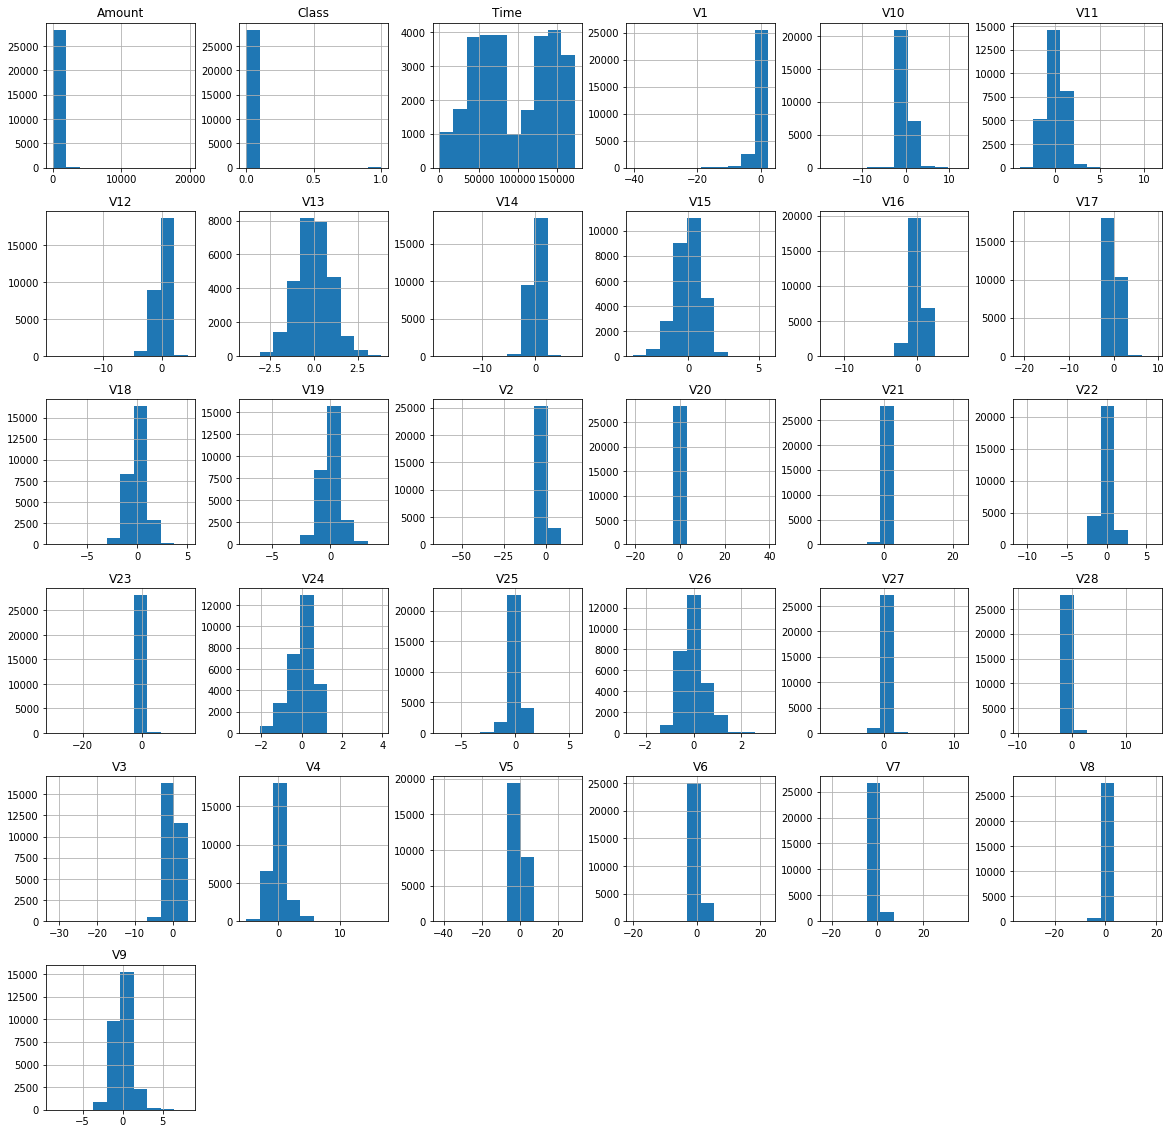

In [7]:
# Plot Histogramof each parameters

data_subset.hist(figsize=(20,20))
plt.show()

In [8]:
#Determine number of fraud cases in dataset

Fraud = data_subset[data_subset['Class']==1]
Valid = data_subset[data_subset['Class']==0]

outlier_fraction = float(len(Fraud))/len(Valid) # Imbalance Ratio

print("Fraud Case: {0}, Valid Cases: {1} and Outlier Fraction: {2}".format(len(Fraud),len(Valid),outlier_fraction))

Fraud Case: 49, Valid Cases: 28432 and Outlier Fraction: 0.0017234102419808666


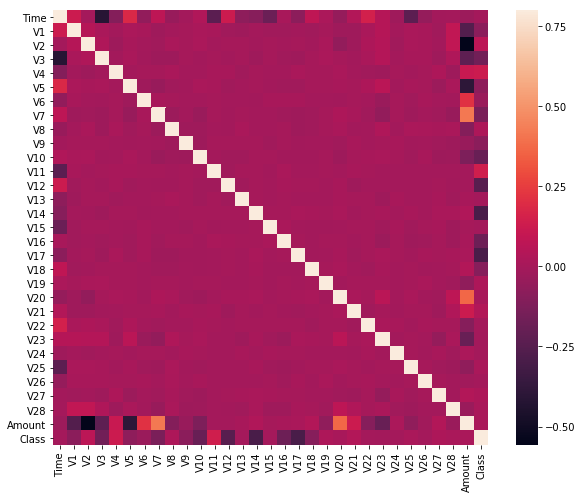

In [9]:
#Lets check Correlation Matrix

corr_mat = data_subset.corr()

fig = plt.figure(figsize = (10,8))

sns.heatmap(corr_mat, vmax=.8, square = True)
plt.show()


In [10]:
# break data into independent and dependent column variable
columns = df_credit.columns

X = df_credit[columns[:len(columns)-1]]
Y = df_credit[columns[-1]]




## ML Algorithms

Now we can select an algorithm to build our model. The most common used algorithm for outlier detections are "Local Outlier Factor" and "Isolation Forest", SVM is also used but it increases computional cost when applied on large dataset. For reference and understanding of the said algorithms visit:
https://scikit-learn.org/stable/modules/outlier_detection.html

<b>Local Outlier Factor</b>- is an unsupervised outlier detection method, it calculates anomaly score of each sample and recall local outlier factor, so it measures the deviation of density of given sample with respect to iys neighbors. It is similar to K nearest neighbors method.

<b>Isolation Forest</b> - It returns anomaly score of each sample using isolating observations by randomly selecting a feature and then randomly slecting a split value between maximum and minimum value of the selected feature.

In [6]:
#Import Packages for ML algorithms
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle




In [13]:
# define a random state
state = 1
#define the outlier detection methods

classifier = ['IsolationForest', 'LocalOutlierFactor']

# Normalize and scale time and amount as all others are already scaled.

df_normalized = df_credit
df_normalized['Time'] = StandardScaler().fit_transform(df_normalized['Time'].values.reshape(-1, 1))
df_normalized['Amount'] = StandardScaler().fit_transform(df_normalized['Amount'].values.reshape(-1, 1))

# generate training and test sets

X_train, X_test = train_test_split(df_normalized, test_size=0.2, random_state=416)
X_train = X_train[X_train.Class == 0]
Y_train = X_train['Class']
X_train = X_train.drop(['Class'], axis=1) 


Y_test = X_test['Class'] 
X_test = X_test.drop(['Class'], axis=1) 

X_train = X_train.values
X_test = X_test.values

In [24]:
# fit the model

for i in classifier:
    if i is 'LocalOutlierFactor':
        clf = LocalOutlierFactor(n_neighbors = 20, contamination = outlier_fraction,  novelty=True)
        clf.fit(X_train)
        filename = 'LocalOutlierFactor.sav'
        pickle.dump(clf, open(filename, 'wb'))
        
    else:
        clf = IsolationForest(max_samples = len(X_train), contamination = outlier_fraction, random_state = state)
        clf.fit(X_train)
        filename = 'IsolationForest.sav'
        pickle.dump(clf, open(filename, 'wb'))
        
        
   

/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


In [25]:
model_AUPRC = {}
confusionMatrix = {}

/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


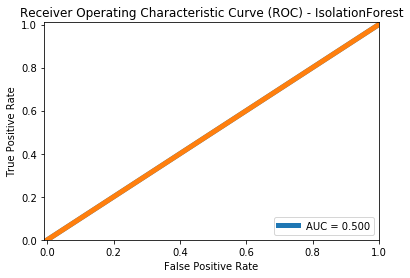

IsolationForest
Accuracy: 0.9976475545100242
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.40      0.51      0.45       108

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.70      0.75      0.72     56962
weighted avg       1.00      1.00      1.00     56962



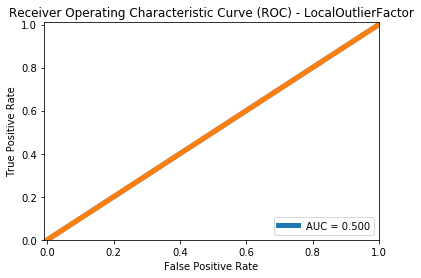

LocalOutlierFactor
Accuracy: 0.99626066500474
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.00      0.00      0.00       108

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [26]:
for i in classifier:
    
    if i is 'LocalOutlierFactor':
        loaded_model = pickle.load(open(i+'.sav', 'rb'))
        y_hat = loaded_model.predict(X_test)
        scores_pred = loaded_model.negative_outlier_factor_
    else:
        loaded_model = pickle.load(open(i+'.sav', 'rb'))
        y_hat = loaded_model.predict(X_test)
        scores_pred = loaded_model.decision_function(X_test)
    #rehsape the prediction values to 0 for legitimate and 1 for fraud
    
    y_hat[y_hat==1] = 0
    y_hat[y_hat==-1] = 1
    
    
    #classification Matrix
    mse = np.mean(np.power(Y_test - y_hat, 2))
    error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': Y})
    
    false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
    roc_auc = auc(false_pos_rate, true_pos_rate,)

    plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)

    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='lower right')
    plt.title('Receiver Operating Characteristic Curve (ROC) - '+i)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    model_AUPRC[i]= roc_auc
    print(i)
    print("Accuracy: {}".format(accuracy_score(Y_test,y_hat)))
    print(classification_report(Y_test, y_hat))
    confusionMatrix[i] = confusion_matrix(Y_test, y_hat)

### Model Performance
Here we can see that <b> Isolation Forest </b>[99.77%] and <b> Local Outlier Factor </b>[99.62%] performed prettygood in terms of accuracy, but if we measure precision and recall then we can say that Isolation Forest performed better than other while detecting fraudulent transaction.

Since dataset has huge imbalance ratio in target variable, so we can say accuracy is not a better metrics to comment on any model. Area under the curve is being widely used to determine model's performance. For more info http://gim.unmc.edu/dxtests/roc3.htm

We can notice that Area under ROC curve is 0.500 for IsolationForest and 0.005 for LocalOutlierFactor, we can apprehend that these two will not perform better at detecting fraud. Let's try few deep learning models.

# Deep Learning Model

In [5]:
#import required packages
from sklearn.metrics import mean_squared_error
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers


lets visualize dataset a bit more using subset of the data.

Text(0, 0.5, 'Number of Observations')

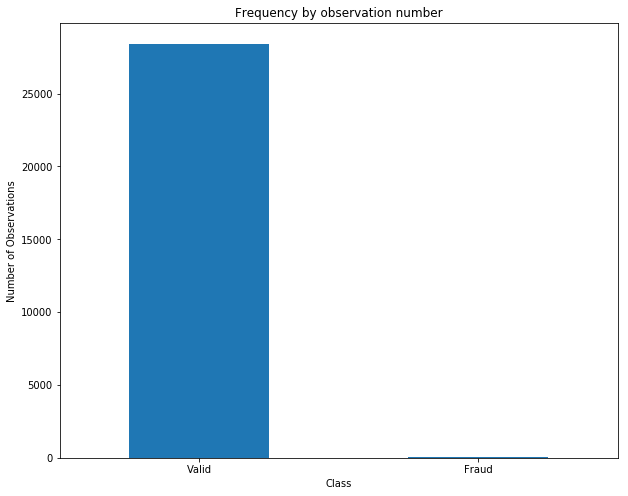

In [21]:
fig = plt.figure(figsize = (10,8))
count_classes = pd.value_counts(data_subset['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ['Valid', 'Fraud'])
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

Now I would like to dig deep and visualize amount vs percentage of transactions based on amount. Further, low amount may be less significant than high value fraud, I will visualize data for more than 100 units.  

/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


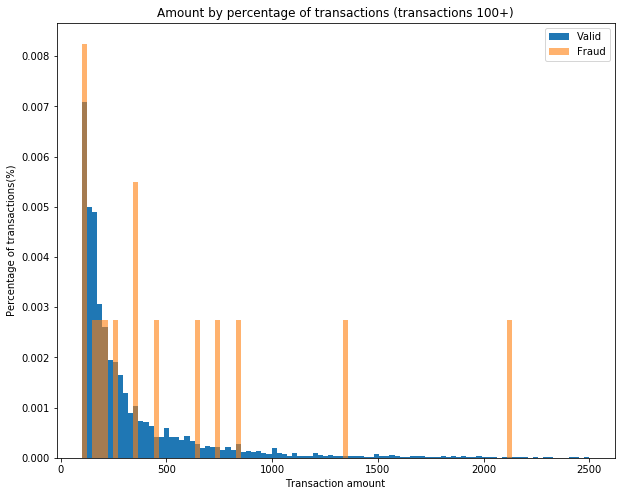

In [22]:
fig = plt.figure(figsize = (10,8))
bins = np.linspace(100, 2500, 100)
plt.hist(data_subset[data_subset.Class == 0].Amount, bins, alpha=1, normed=True, label='Valid')
plt.hist(data_subset[data_subset.Class == 1].Amount, bins, alpha=0.6, normed=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions 100+)")
plt.xlabel("Transaction amount")
plt.ylabel("Percentage of transactions(%)");
plt.show()

We can analysis from given subset that there are very few fraud cases and mostly are amount below 1000, we are not able to see any pattern in the anamoly. Lets try few models.

## Basic Autoencoder

In [32]:
epochs = 25
batch_size = 80
input_dim = X_train.shape[1]
encoding_dim = 14
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-5

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

Instructions for updating:
Colocations handled automatically by placer.


In [34]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

    
cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[cp, tb]).history

Instructions for updating:
Use tf.cast instead.


Train on 227461 samples, validate on 56962 samples
Epoch 1/25
227461/227461 [==============================] - 42s 186us/step - loss: 0.8379 - acc: 0.5272 - val_loss: 0.7975 - val_acc: 0.6055
Epoch 2/25
227461/227461 [==============================] - 36s 160us/step - loss: 0.7516 - acc: 0.6210 - val_loss: 0.7735 - val_acc: 0.6347
Epoch 3/25
227461/227461 [==============================] - 34s 148us/step - loss: 0.7368 - acc: 0.6457 - val_loss: 0.7615 - val_acc: 0.6576
Epoch 4/25
227461/227461 [==============================] - 48s 212us/step - loss: 0.7279 - acc: 0.6639 - val_loss: 0.7550 - val_acc: 0.6661
Epoch 5/25
227461/227461 [==============================] - 47s 205us/step - loss: 0.7220 - acc: 0.6753 - val_loss: 0.7499 - val_acc: 0.6802
Epoch 6/25
227461/227461 [==============================] - 36s 157us/step - loss: 0.7169 - acc: 0.6867 - val_loss: 0.7450 - val_acc: 0.6928
Epoch 7/25
227461/227461 [==============================] - 41s 182us/step - loss: 0.7139 - acc: 0.6939

In [35]:
autoencoder = load_model('autoencoder_fraud.h5')

fatal: pathspec 'remote' did not match any files


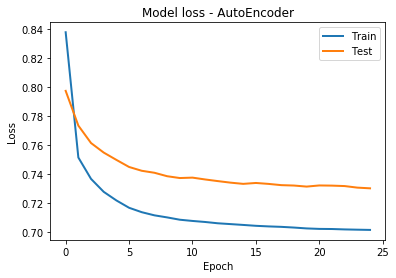

In [55]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss - AutoEncoder')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [56]:
X_test_predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_predictions, 2), axis=1)
error_df_en = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': Y_test})
error_df_en.describe()

,Reconstruction_error,True_class
count,56962.000000,56962.000000
mean,0.725888,0.001896
std,3.598408,0.043502
min,0.044886,0.000000
25%,0.244133,0.000000
50%,0.392316,0.000000
75%,0.621093,0.000000
max,415.076715,1.000000


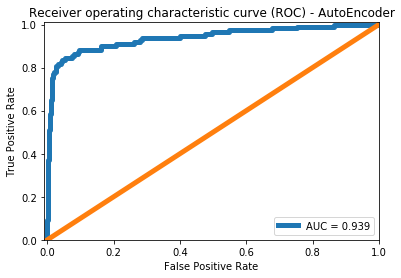

In [57]:
#AUPRC
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df_en.True_class, error_df_en.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC) - AutoEncoder')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

model_AUPRC['AutoEncoder'] = roc_auc

{'IsolationForest': 0.5,
 'LocalOutlierFactor': 0.5,
 'AutoEncoder': 0.933462774696461}

In [60]:
pred_y = [1 if e > 5 else 0 for e in error_df_en.Reconstruction_error.values]
confusionMatrix['AutoEncoder'] = confusion_matrix(error_df_en.True_class, pred_y)


## Basic LSTM

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
from keras.models import model_from_json

Using TensorFlow backend.


In [68]:
import sys
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        sys.stdout.write(str(logs.get('loss'))+str(', '))
        sys.stdout.flush()
        self.losses.append(logs.get('loss'))
        
lr = LossHistory()

In [62]:
number_of_neurons_layer1 = 30
number_of_neurons_layer2 = 30 
number_of_neurons_layer3 = 1
number_of_epochs = 25

In [69]:
# design network
from keras import optimizers
sgd = optimizers.SGD(lr=1e-5, clipnorm=1.)

model = Sequential()
model.add(Dense(number_of_neurons_layer1,input_shape=(30, ), activation='relu'))
model.add(Dense(number_of_neurons_layer2, activation='relu'))
model.add(Dense(number_of_neurons_layer3, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd')
model.fit(X_train, Y_train, epochs=number_of_epochs, batch_size=72, validation_data=(X_train, Y_train), verbose=0, shuffle=True,callbacks=[lr])



0.5270088, 0.45741665, 0.48255694, 0.4833695, 0.46289212, 0.44594657, 0.4548914, 0.3944175, 0.4015462, 0.3708465, 0.3749754, 0.40725946, 0.34538922, 0.38347355, 0.33172533, 0.34843957, 0.3363467, 0.30916378, 0.33522275, 0.3089144, 0.27087697, 0.2907377, 0.3113637, 0.2962643, 0.29083967, 0.27610773, 0.26805577, 0.24560373, 0.2609338, 0.27021658, 0.28079742, 0.251909, 0.24780406, 0.25118232, 0.27118376, 0.2526466, 0.21267016, 0.22722234, 0.23911493, 0.22325653, 0.233046, 0.22125393, 0.22438319, 0.19559021, 0.2087857, 0.18633574, 0.19579342, 0.19381678, 0.20227632, 0.20137, 0.18738514, 0.17284533, 0.20353346, 0.16652943, 0.18700807, 0.18493906, 0.1710283, 0.18355258, 0.17098993, 0.17943002, 0.17215367, 0.19135189, 0.16008276, 0.13708997, 0.17224301, 0.1753287, 0.15326585, 0.16120073, 0.14458525, 0.15086311, 0.14075394, 0.1494417, 0.13126606, 0.12956956, 0.14815071, 0.14264104, 0.1283127, 0.13986997, 0.12985806, 0.11814019, 0.14122711, 0.14750098, 0.12824985, 0.14335659, 0.13345486, 0.1370

In [70]:
model.save("lstm_model.h5")

In [ ]:
# load model

loaded_model = load_model('lstm_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [3]:
!ls

IsolationForest.sav	autoencoder_fraud.h5  lstm_model.json
LSTM_fraud.h5		logs		      spark-events
LocalOutlierFactor.sav	lstm_model.h5	      user-libs


In [73]:
# The code was removed by Watson Studio for sharing.

TypeError: save_data() missing 1 required positional argument: 'data'

In [1]:
# Evaluate and predict Model

Y_pred = loaded_model.predict(X_test)
mse = np.mean(np.power(Y_test - Y_pred, 2), axis=1)
error_df_lstm = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': Y_test})
error_df_lstm.describe()

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20190627211057-0001
KERNEL_ID = 91a02f3a-e5c3-4502-817f-2ad5e771371d


NameError: name 'loaded_model' is not defined

In [ ]:
#AUPRC
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df_lstm.True_class, error_df_lstm.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC) - LSTM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

model_AUPRC['LSTM'] = roc_auc

In [ ]:
confusionMatrix['LSTM'] = confusion_matrix(error_df_lstm.True_class, Y_pred)


In [ ]:
plt.plot(lstm['loss'], linewidth=2, label='Train')
plt.plot(lstm['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss - LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [ ]:
#Compare Confusion Matrix

plt.subplot(2, 2, 1)
sns.heatmap(confusionMatrix['IsolationForest'], xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'], annot=True, fmt="d")
plt.title('ConfusionMatrix -- IsolationForest')

plt.subplot(2, 2, 2)
sns.heatmap(confusionMatrix['LocalOutlierFactor'], xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'], annot=True, fmt="d")
plt.title('ConfusionMatrix -- LocalOutlierFactor')

plt.subplot(2, 2, 3)
sns.heatmap(confusionMatrix['AutoEncoder'], xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'], annot=True, fmt="d")
plt.title('ConfusionMatrix -- AutoEncoder')

plt.subplot(2, 2, 4)
sns.heatmap(confusionMatrix['LSTM'], xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'], annot=True, fmt="d")
plt.title('ConfusionMatrix -- LSTM')

plt.show()

In [ ]:
# Compare Area Under ROC

plt.bar(model_AUPRC.keys(), model_AUPRC.values())
plt.show()

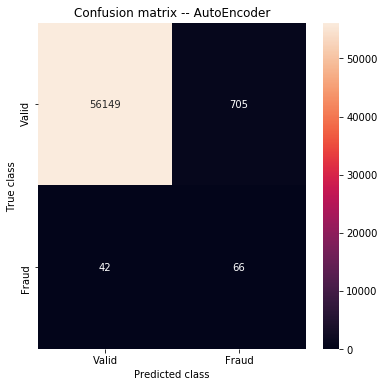

In [60]:


plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'], annot=True, fmt="d");
plt.title("Confusion matrix -- AutoEncoder")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

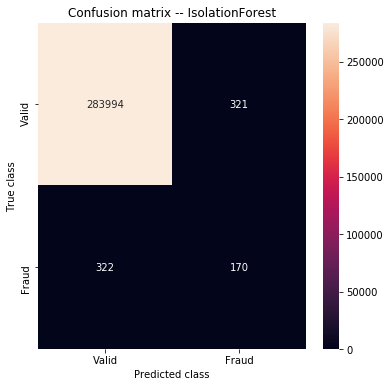

In [63]:

plt.figure(figsize=(6, 6))
sns.heatmap(confusion['IsolationForest'], xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'], annot=True, fmt="d");
plt.title("Confusion matrix -- IsolationForest")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

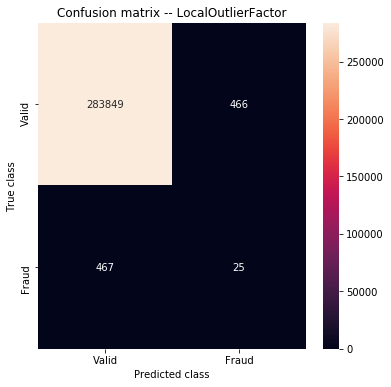

In [65]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion['LocalOutlierFactor'], xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'], annot=True, fmt="d");
plt.title("Confusion matrix -- LocalOutlierFactor")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()